In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

In [ ]:
x = np.array([ 0.0, 1.11111111, 2.22222222, 3.33333333, 4.44444444, 5.55555556, 6.66666667, 7.77777778, 8.88888889, 10.0])
y = np.array([2.04907913, 2.01790925, 2.09382458, 2.06008643, 2.42624547,3.44567705, 3.92073775, 3.88130661, 4.10408773, 4.08783826])

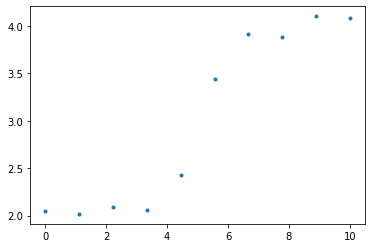

In [ ]:
plt.plot(x,y,'.')

Probabilistic models  the relationship between x and y using ADVI method

In [ ]:
with pm.Model() as model:
    w = pm.Normal('w', 0, 20, shape =4)
    sigma = pm.HalfCauchy('sigma', 0.5)
    mu = pm.Deterministic('mu', w[3]+ w[2]/(1+pm.math.exp(-w[0]+w[1]*x)))
    pm.Normal('y-lik', mu=mu, sd = sigma, observed =y)
    inference = pm.ADVI()
    
    approx = pm.fit(n=1000, method=inference)

Finished [100%]: Average Loss = 415.3


sample from posterior predictive distribution

In [ ]:
with model:
  sample = approx.sample(1000)
  ppc = pm.sample_posterior_predictive(sample)

In [ ]:
with model:
  trace = pm.sample(4000, tune = 2000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, w]


Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 38 seconds.
There were 2115 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.059782117195703526, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2813 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.38427011883201573, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


plot results to illustrate highest posterior density interval (0.98 and 0.6) of the neural network on the same set of axis as your data points

/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


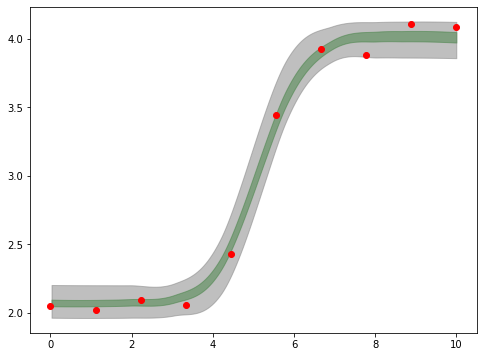

In [ ]:
_,p = plt.subplots(figsize=(8,6))
p.plot(x,y,'ro')
az.plot_hdi(x,trace['mu'], color='g', hdi_prob=0.6)
az.plot_hdi(x, trace['mu'], color = 'gray', hdi_prob=0.98)

- Higher variation, neural network is uncertain
- posterior distribution compatible with the function not passing through the exact mean, which is the neural network and a probabilistic neural network caputres the stochastic nature of the data generating process

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98976fef10>,
      dtype=object)

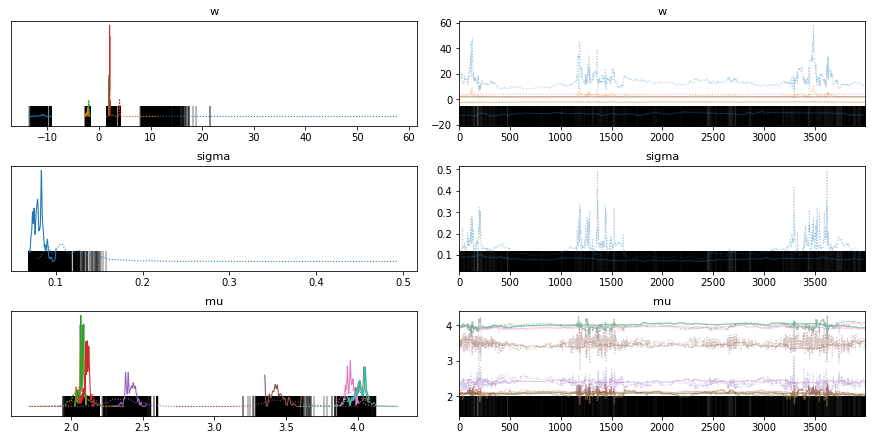

In [ ]:
az.plot_trace(trace)